In [1]:
from pnpl.datasets import LibriBrainPhoneme

train_dataset = LibriBrainPhoneme(
    data_path="./data/",
    tmin=0.0,
    tmax=0.5,
    standardize=True,
    partition="train",
)

val_dataset = LibriBrainPhoneme(
    data_path="./data/",
    tmin=0.0,
    tmax=0.5,
    standardize=True,
    partition="validation",
)

In [2]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def viz_label(dataset):
    # dataset[0].shape == (306, 125)
    loader = DataLoader(
        dataset,
        batch_size=1024,
        num_workers=4,
    )

    label_counts = torch.zeros((39,), dtype=torch.int64).to(device)
    labels = dataset.labels_sorted

    for batch in tqdm(loader):
        label = batch[1].to(device)
        label_counts += torch.bincount(label, minlength=39)

    # plotting the label distribution

    label_counts = label_counts.cpu().numpy()

    plt.figure(figsize=(10, 5))
    plt.bar(range(39), label_counts)
    plt.xlabel('Phoneme Labels')
    plt.ylabel('Count')
    plt.title('Phoneme Label Distribution')
    # plt.xticks(range(39), rotation=90)
    plt.xticks(range(39), labels)
    plt.grid(axis='y')
    plt.tight_layout()

    # Show actual numbers on top of each bar
    for i, count in enumerate(label_counts):
        plt.text(i, count, f'{count / label_counts.sum() * 100:.2f}%',
                 ha='center', va='bottom', fontsize=8)

    plt.show()

100%|██████████| 1306/1306 [01:20<00:00, 16.29it/s]


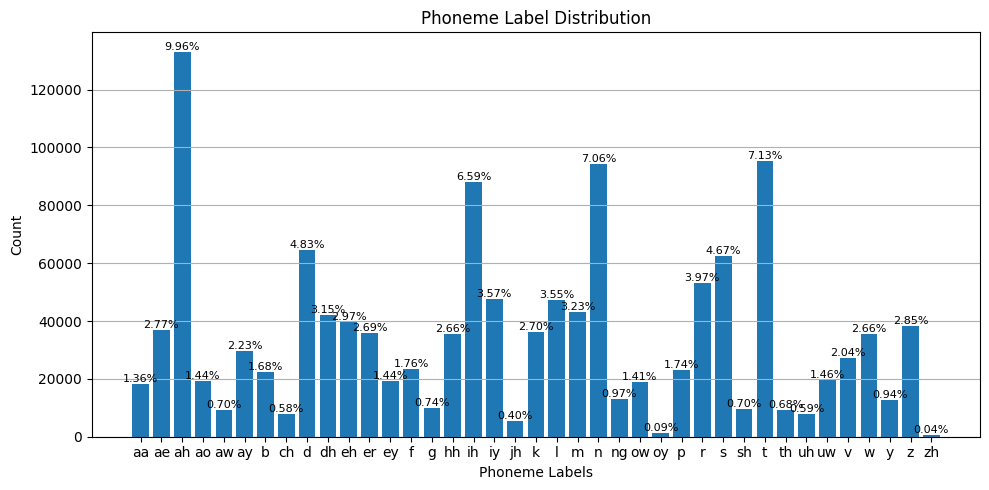

In [3]:
viz_label(train_dataset)

100%|██████████| 278/278 [00:16<00:00, 17.13it/s]


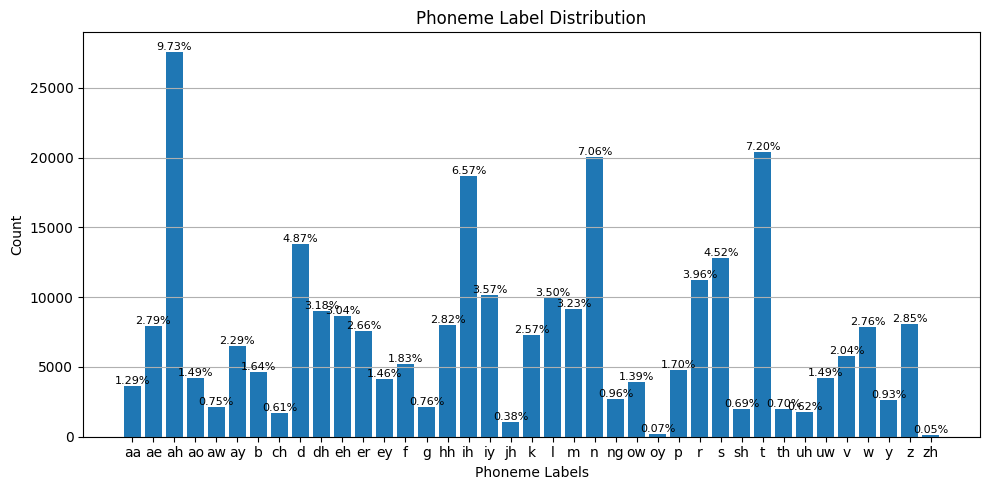

In [4]:
viz_label(val_dataset)

In [5]:
import pandas as pd

pred_csv = "preds_best-val_bal_acc-baseline-xl-hpo-2-epoch=08-val_f1_macro=0.7019.csv"

df = pd.read_csv(pred_csv, index_col=0)

df["pred"] = df.idxmax(axis=1).str.extract(r'phoneme_(\d+)').astype(int) - 1

ax = df["pred"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
for i, count in enumerate(df["pred"].value_counts().sort_index()):
    ax.text(i, count, f'{count / df["pred"].count() * 100:.2f}%', ha='center', va='bottom', fontsize=8)

FileNotFoundError: [Errno 2] No such file or directory: 'preds_best-val_bal_acc-baseline-xl-hpo-2-epoch=08-val_f1_macro=0.7019.csv'